In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as fmr
import FMR_Evaluator_v210208 as eva

import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

#help(FMR_Reader)

no style found


In [2]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

In [3]:
dataset='BF CPW8 warmup'
data=fmr.read(dataset,loc='../../../messungen/')

100%|██████████| 5786/5786 [04:44<00:00, 20.36it/s]


with temped and boxxed preamplifier (25°C)


In [4]:
d=data

In [5]:
#t=np.flip(d['t'],axis=0)
t=d['t']
t=np.array(t-t[0], dtype='float64')/3600
n=np.arange(np.shape(t)[0])
RT=d['T_RT(H)']
sample=d['T_sample(H)']
magnet=d['T_magnet(H)']
S21=d['S21']
f=d['f']

In [6]:
#magnet[:160]=1
#magnet[:94]=0
#sample[5:8]=.0956
center=195
span=40
weight_sample=-np.arctan((n-center)/span)/np.pi+.5
weight_magnet=np.arctan((n-center)/span)/np.pi+.5
T=sample*weight_sample+magnet*weight_magnet

In [7]:
%matplotlib qt
start=155
stop=200
plt.semilogy(n[start:stop],sample[start:stop],
           c=cpd.curves()(1),
           label='$T_{fmr}$',
           lw=1.5)
plt.semilogy(n[start:stop],magnet[start:stop],
           c=cpd.curves()(.65),
           label='$T_{nagnet}$',
           lw=1.5)
plt.semilogy(n[start:stop],T[start:stop],
           c=cpd.curves(color='magenta')(1),
           label='$T_{dut}$',
           lw=1.5)
plt.grid()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


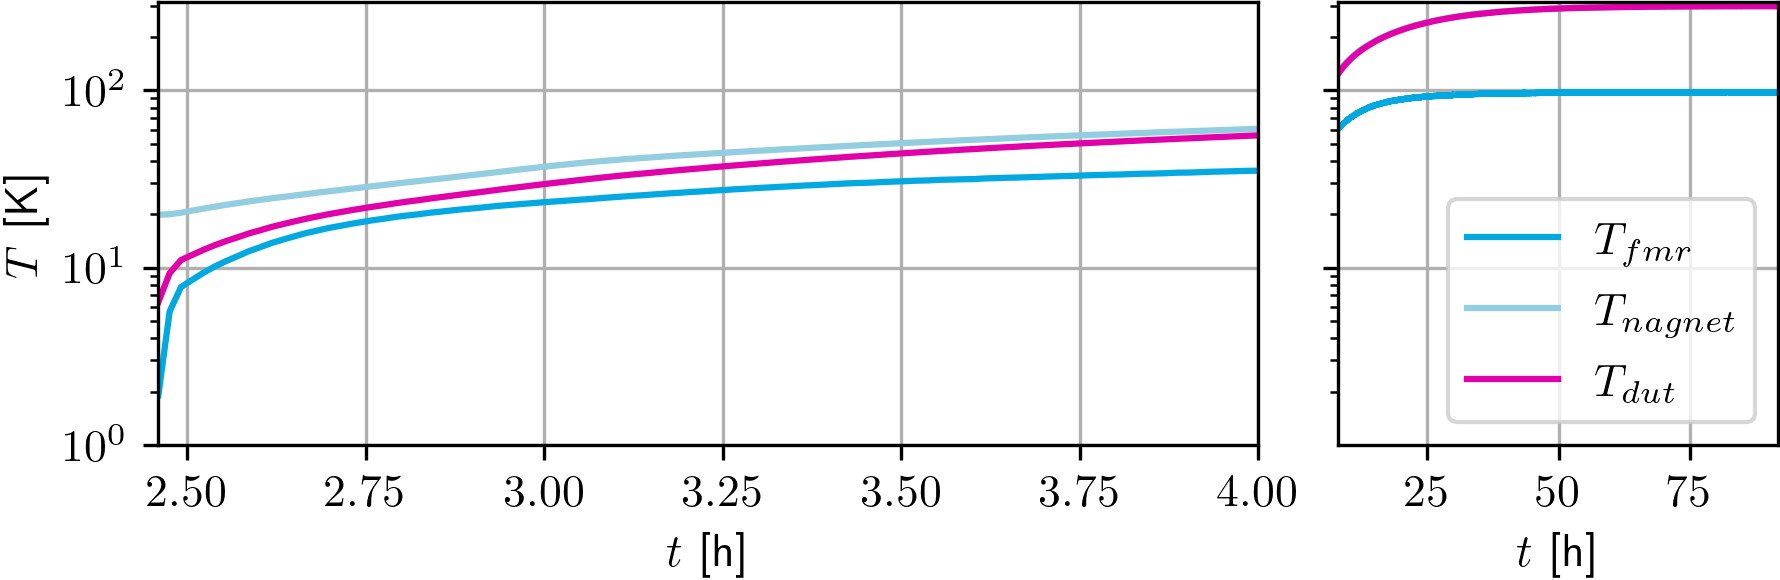

In [8]:
%matplotlib inline
#magnet[:160]=np.nan
start=155
stop=-1
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
fig, (ax0, ax1) = plt.subplots(ncols=2,
                                    gridspec_kw={"width_ratios":[2.5,1]},
                                    constrained_layout=True,
                                             figsize=[6,2]) 
ax0.semilogy(t[start:stop],sample[start:stop],
           c=cpd.curves()(1),
           label='$T_{fmr}$',
           lw=1.5)
ax0.semilogy(t[start:stop],magnet[start:stop],
           c=cpd.curves()(.65),
           label='$T_{nagnet}$',
           lw=1.5)
ax0.semilogy(t[start:stop],T[start:stop],
           c=cpd.curves(color='magenta')(1),
           label='$T_{dut}$',
           lw=1.5)
ax1.semilogy(t[start:stop],sample[start:stop],
           c=cpd.curves()(1),
           label='$T_{fmr}$',
           lw=1.5)
ax1.semilogy(t[start:stop],magnet[start:stop],
           c=cpd.curves()(.65),
           label='$T_{nagnet}$',
           lw=1.5)
ax1.semilogy(t[start:stop],T[start:stop],
           c=cpd.curves(color='magenta')(1),
           label='$T_{dut}$',
           lw=1.5)

ax0.set_xlim([t[start],4])
ax0.set_ylim([1,315])
ax1.set_yticks([10,100])
ax1.set_xlim([8,t[stop]])
ax1.set_ylim([1,315])
ax1.set_yticklabels([])
ax0.grid()
ax1.grid()
ax0.set_ylabel('$T$ [K]')
ax0.set_xlabel('$t$ [h]')
ax1.set_xlabel('$t$ [h]')
ax1.legend(loc='lower right')


#ax0.vlines(t[center],ymin=0,ymax=200,
#           color=cpd.curves(color='black')(.35))
#ax0.vlines(t[center-span],ymin=0,ymax=200,
#           color=cpd.curves(color='black')(.8))
#ax0.vlines(t[center+span],ymin=0,ymax=200,
#           color=cpd.curves(color='black')(.8))
#plt.savefig('T(t).pgf')

In [9]:
hist=np.histogram(T, bins=100, range=(np.nanmin(T),np.nanmax(T)))
dig=np.digitize(T,bins=hist[1])
hist, dig
np.shape(dig), np.shape(hist[1]), np.shape(hist[0]), dig

((5786,), (101,), (100,), array([101, 101, 101, ..., 100, 100, 100]))

In [10]:
T

array([         nan,          nan,          nan, ..., 298.32245072,
       298.2438685 , 298.35398813])

In [11]:
real=S21.real
imag=S21.imag

magnet[:160]=1
magnet[:94]=0
sample[5:8]=.0956
center=220
span=40
weight_sample=-np.arctan((n-center)/span)/np.pi+.5
weight_magnet=np.arctan((n-center)/span)/np.pi+.5
T=sample*weight_sample+magnet*weight_magnet
print(T)
#new_T_log=np.logspace(np.log10(50),np.log10(100),11)
new_T_log=np.linspace(50,110,61)

new_T_lin=np.linspace(1,300,300)

counter_log=np.zeros(np.shape(new_T_log))
new_real_log=np.zeros((np.shape(real)[0],np.shape(new_T_log)[0]))
new_imag_log=np.zeros((np.shape(imag)[0],np.shape(new_T_log)[0]))
dig_log=np.digitize(T,bins=new_T_log)
for i,d in enumerate(dig_log):
    counter_log[d-1]=counter_log[d-1]+1
    new_real_log[:,d-1]=new_real_log[:,d-1]+real[:,i]
    new_imag_log[:,d-1]=new_imag_log[:,d-1]+imag[:,i]
for i, c in enumerate(counter_log):
    new_real_log[:,i]=new_real_log[:,i]/c
    new_imag_log[:,i]=new_imag_log[:,i]/c
new_S21_log=new_real_log+1j*new_imag_log

counter_lin=np.zeros(np.shape(new_T_lin))
new_real_lin=np.zeros((np.shape(real)[0],np.shape(new_T_lin)[0]))
new_imag_lin=np.zeros((np.shape(imag)[0],np.shape(new_T_lin)[0]))
dig_lin=np.digitize(T,bins=new_T_lin)
for i,d in enumerate(dig_lin):
    counter_lin[d-1]=counter_lin[d-1]+1
    new_real_lin[:,d-1]=new_real_lin[:,d-1]+real[:,i]
    new_imag_lin[:,d-1]=new_imag_lin[:,d-1]+imag[:,i]    
for i, c in enumerate(counter_lin):
    new_real_lin[:,i]=new_real_lin[:,i]/c
    new_imag_lin[:,i]=new_imag_lin[:,i]/c
new_S21_lin=new_real_lin+1j*new_imag_lin
new_S21_lin
#new_T_lin,new_T_log

[1.10006769e-01 9.01331607e-02 9.01084833e-02 ... 2.98320388e+02
 2.98241807e+02 2.98351926e+02]


array([[ 2.29474732e+00+3.46896238e+00j,             nan           +nanj,
                    nan           +nanj, ...,
        -6.26817142e-02+1.95214982e+00j,             nan           +nanj,
         2.33491540e+00+3.44927947e+00j],
       [-3.07744600e+00+2.89283078e+00j,             nan           +nanj,
                    nan           +nanj, ...,
        -1.94721322e+00+2.95030390e-01j,             nan           +nanj,
        -3.05088424e+00+2.92921548e+00j],
       [-3.49778916e+00-2.49777764e+00j,             nan           +nanj,
                    nan           +nanj, ...,
        -6.22808213e-01-1.91132165e+00j,             nan           +nanj,
        -3.52960025e+00-2.46366398e+00j],
       ...,
       [ 5.67307200e-04-4.01562814e-03j,             nan           +nanj,
                    nan           +nanj, ...,
         9.73755287e-05-1.85977197e-04j,             nan           +nanj,
        -4.49149723e-04-4.37939991e-03j],
       [ 3.80054986e-03+1.65551128e-03j,    

(0.0, 1.0)

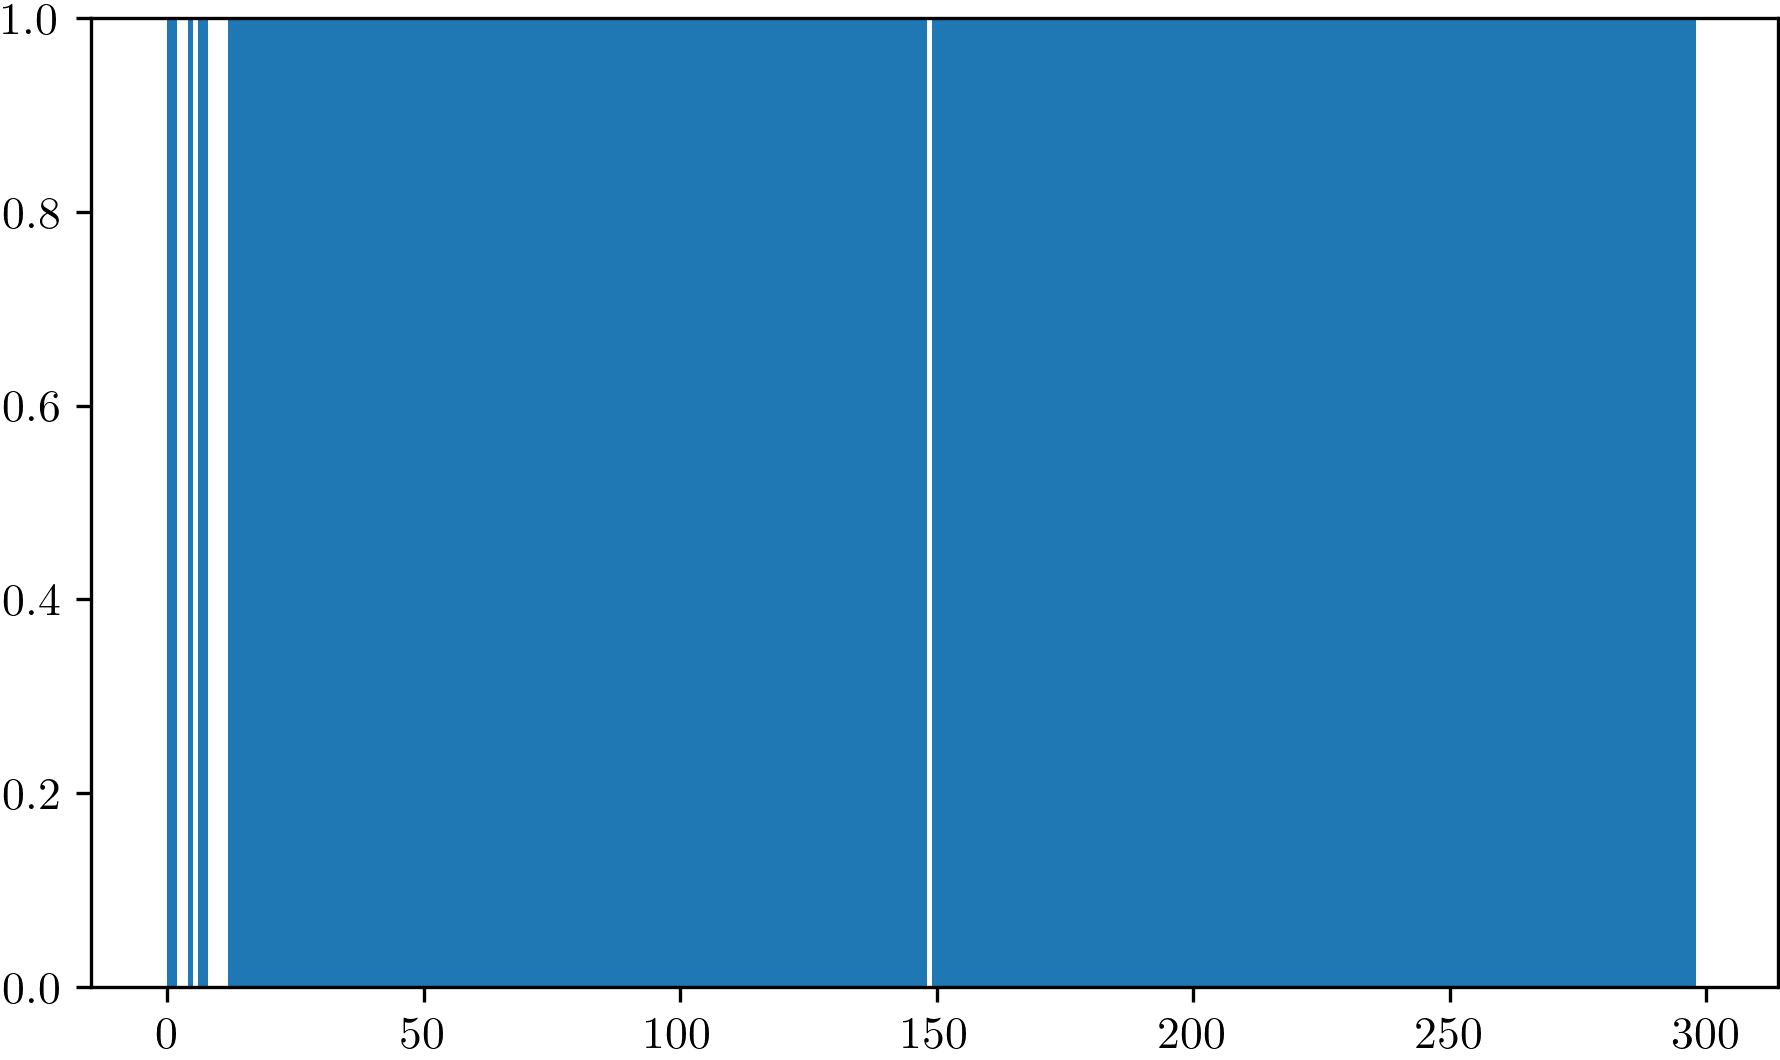

In [12]:
plt.hist(dig_lin, bins=len(new_T_lin))
#plt.hist(dig_log, bins=len(new_T_log))
plt.plot(new_T_lin)
plt.ylim([0,1])
#plt.plot(new_T_log)

(0.0, 1.0)

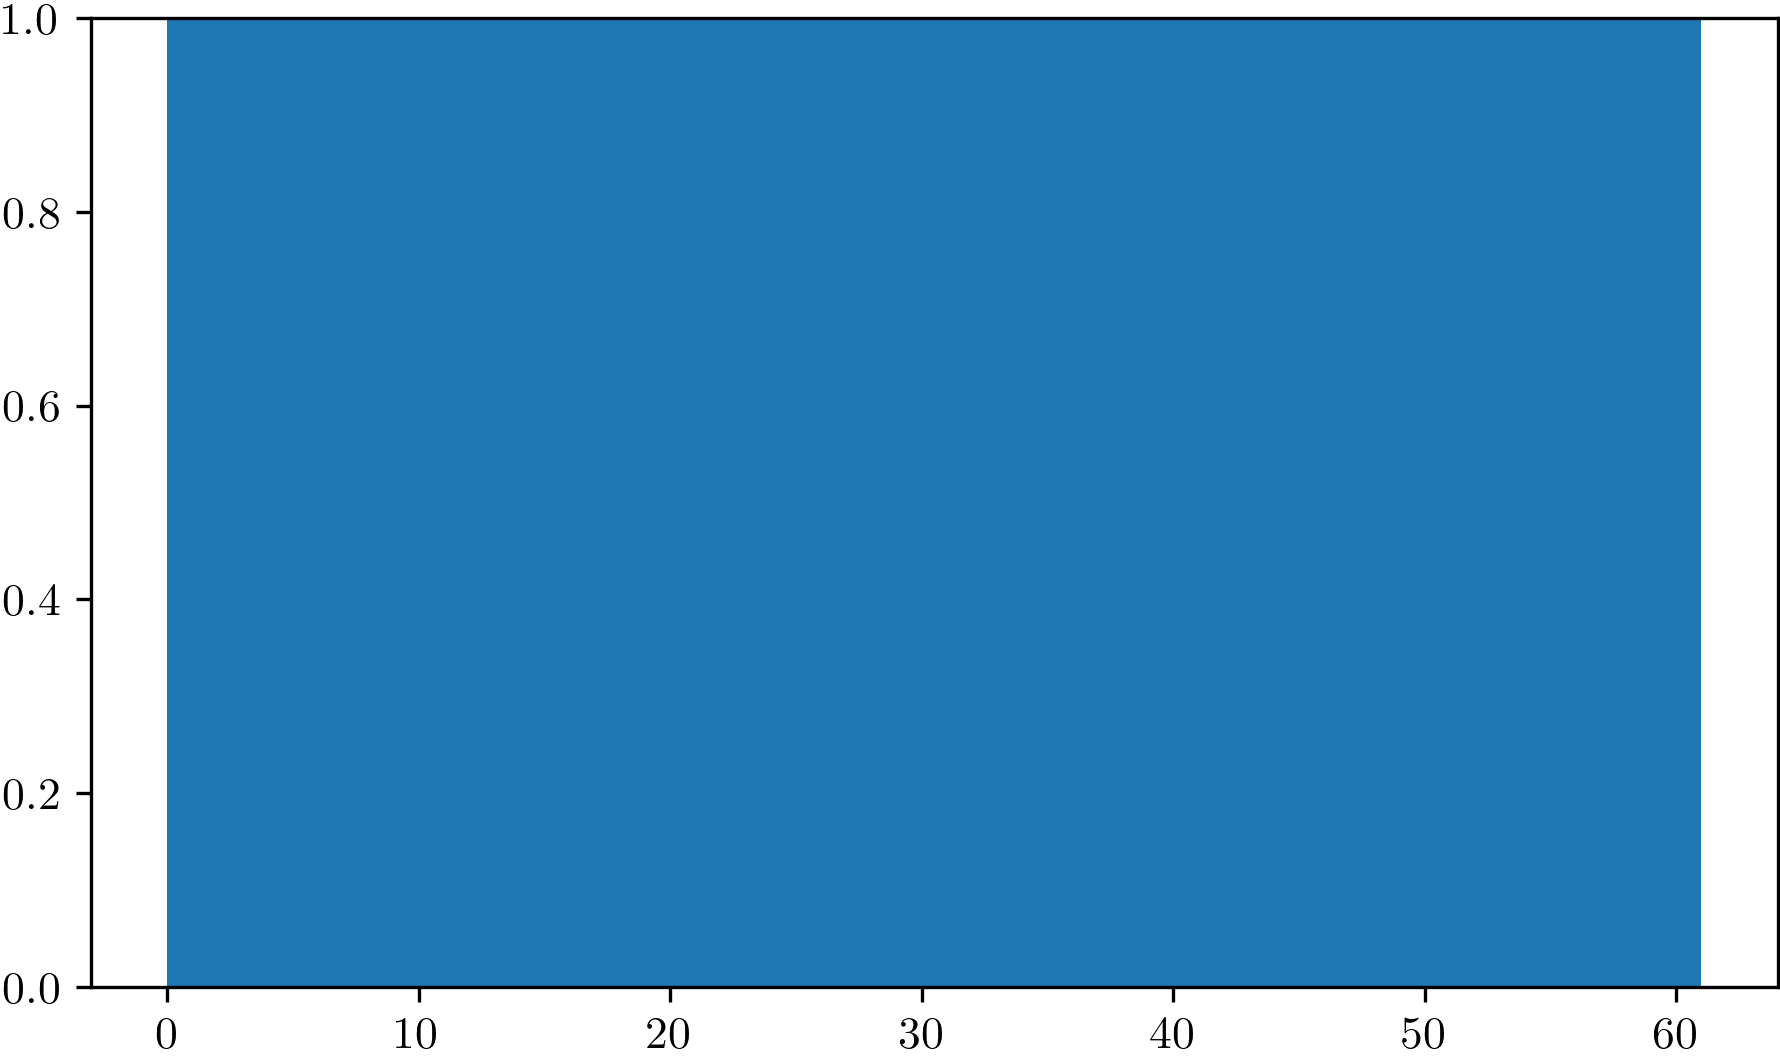

In [13]:

plt.hist(dig_log, bins=len(new_T_log))
plt.plot(new_T_log)
plt.ylim([0,1])

In [14]:
new_norm=new_S21_lin[:,6]
ones,nnorm_lin=np.meshgrid(np.ones(np.shape(new_T_lin)[0]),new_norm)
ones,nnorm_log=np.meshgrid(np.ones(np.shape(new_T_log)[0]),new_norm)
S21norm_log=new_S21_log/nnorm_log
S21norm_lin=new_S21_lin/nnorm_lin
S21norm_lin,S21norm_log,np.argmin(np.abs(8.5-T1))



NameError: name 'T1' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


(-22.36283325620239, 2.178158081481051)


<Figure size 1800x1080 with 0 Axes>

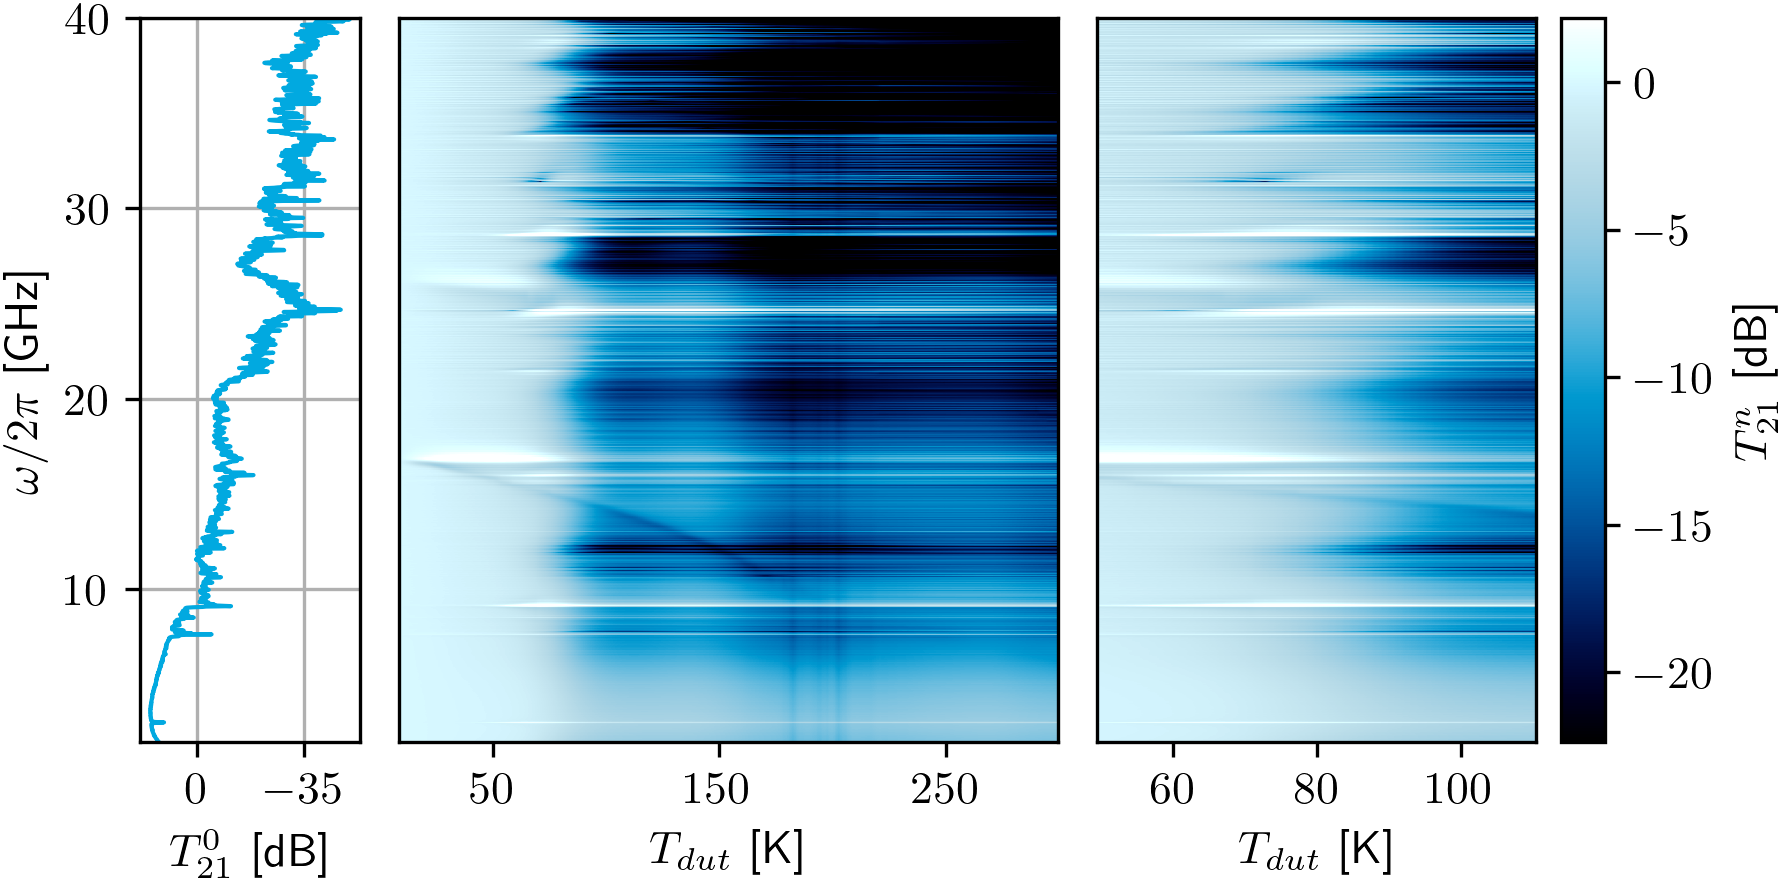

In [15]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img_log=np.log10(np.abs(S21norm_log))*20
img_lin=np.log10(np.abs(S21norm_lin))*20
#img_log=np.log10(np.abs(new_S21_log))*20
#img_lin=np.log10(np.abs(new_S21_lin))*20
img_log=img_log[:,1:-1]
img_lin=img_lin[:,3:-1]

norm=np.log10(np.abs(new_norm))*20
T0=new_T_log
T1=new_T_lin
f=f

xlabel='$T_{dut}$ [K]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}^0$ [dB]'
clabel='$T_{21}^n$ [dB]'
contrast=1.5
fig_nr=1


stepsizeT0_low=np.abs(T0[0]-T0[1])/2
stepsizeT0_high=np.abs(T0[-1]-T0[-2])/2
stepsizeT1=np.abs(T1[0]-T1[1])/2
stepsizef=np.abs(f[-1]-f[-2])/2

ext0=[T0[0]-stepsizeT0_low,
     T0[-1]+stepsizeT0_high,
     f[0]-stepsizef,
     f[-1]+stepsizef]
ext1=[T1[0]-stepsizeT1,
     T1[-1]+stepsizeT1,
     f[0]-stepsizef,
     f[-1]+stepsizef]

img=np.concatenate((img_log,img_lin),axis=1)
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))
print(clim)
#clim=(np.nanmean(img)-contrast*np.nanstd(img),0)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img_lin, ax_img_log, ax_clb) = plt.subplots(ncols=4,
                                    gridspec_kw={"width_ratios":[1,3,2,.2]},
                                    constrained_layout=True,
                                             figsize=[6,3]) 

ax_img_log.imshow(img_log, 
                   aspect='auto',
                 extent=ext0,
                 cmap=cpd.images(),
                  clim=clim,
                  origin='lower') 
ax_img_log.set_yticks([])
ax_img_log.set_yticklabels([])
#ax_img_log.set_xscale('log')   
ax_img_log.set_xlabel(xlabel)
ax_img_log.set_xticks([60,80,100])

im=ax_img_lin.imshow(img_lin, 
                   aspect='auto',
                 extent=ext1,
                 cmap=cpd.images(),
                     clim=clim,
                     origin='lower')
ax_img_lin.set_yticks([])
ax_img_lin.set_yticklabels([])
ax_img_lin.set_xlabel(xlabel)
ax_img_lin.set_xticks([50,150,250])
ax_img_lin.set_xlim([8.5,299.5])

ax_norm.plot(norm,f,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

fig.colorbar(im,label=clabel, cax=ax_clb)
plt.savefig('fT_map.pgf')

In [20]:
len(T1),np.shape(np.log10(np.abs(S21norm_lin))*20),len(f)

(300, (1901, 300), 1901)

In [108]:
%matplotlib qt
T=T+10
T=np.linspace(0,200,11)
for t in T:
    posT=np.argmin(np.abs(t-T1))
    plt.plot(f,np.log10(np.abs(S21[:,posT]))*20+t/2, label='%i K'%int(T1[posT]))
    plt.vlines(16.86, ymax=17, ymin=-50)
    plt.legend(loc='upper right')

In [221]:
Hlim=(0,300)
flim=(0,40)
contrast=1
fig_nr=0


normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img_log, ax_img_lin, ax_clb) = plt.subplots(ncols=4,
                                    gridspec_kw={"width_ratios":[1,2.5,2.5,.2]},
                                    constrained_layout=True,
                                             figsize=[6,3])        
ax_img_log.imshow(img_log, 
                   aspect='auto') 
ax_img_log.set_yticks([])
ax_img_log.set_yticklabels([])
ax_img_log.set_xscale('log')   

im=ax_img_lin.imshow(img_lin, 
                   aspect='auto')
ax_img_lin.set_yticks([])
ax_img_lin.set_yticklabels([])

fig.colorbar(im,label=clabel, cax=ax_clb)

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,f,c=cpd.curves()(1))       
#ax_norm.set_ylabel(ylabel)
#ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

NameError: name 'H' is not defined

<Figure size 1800x1080 with 0 Axes>

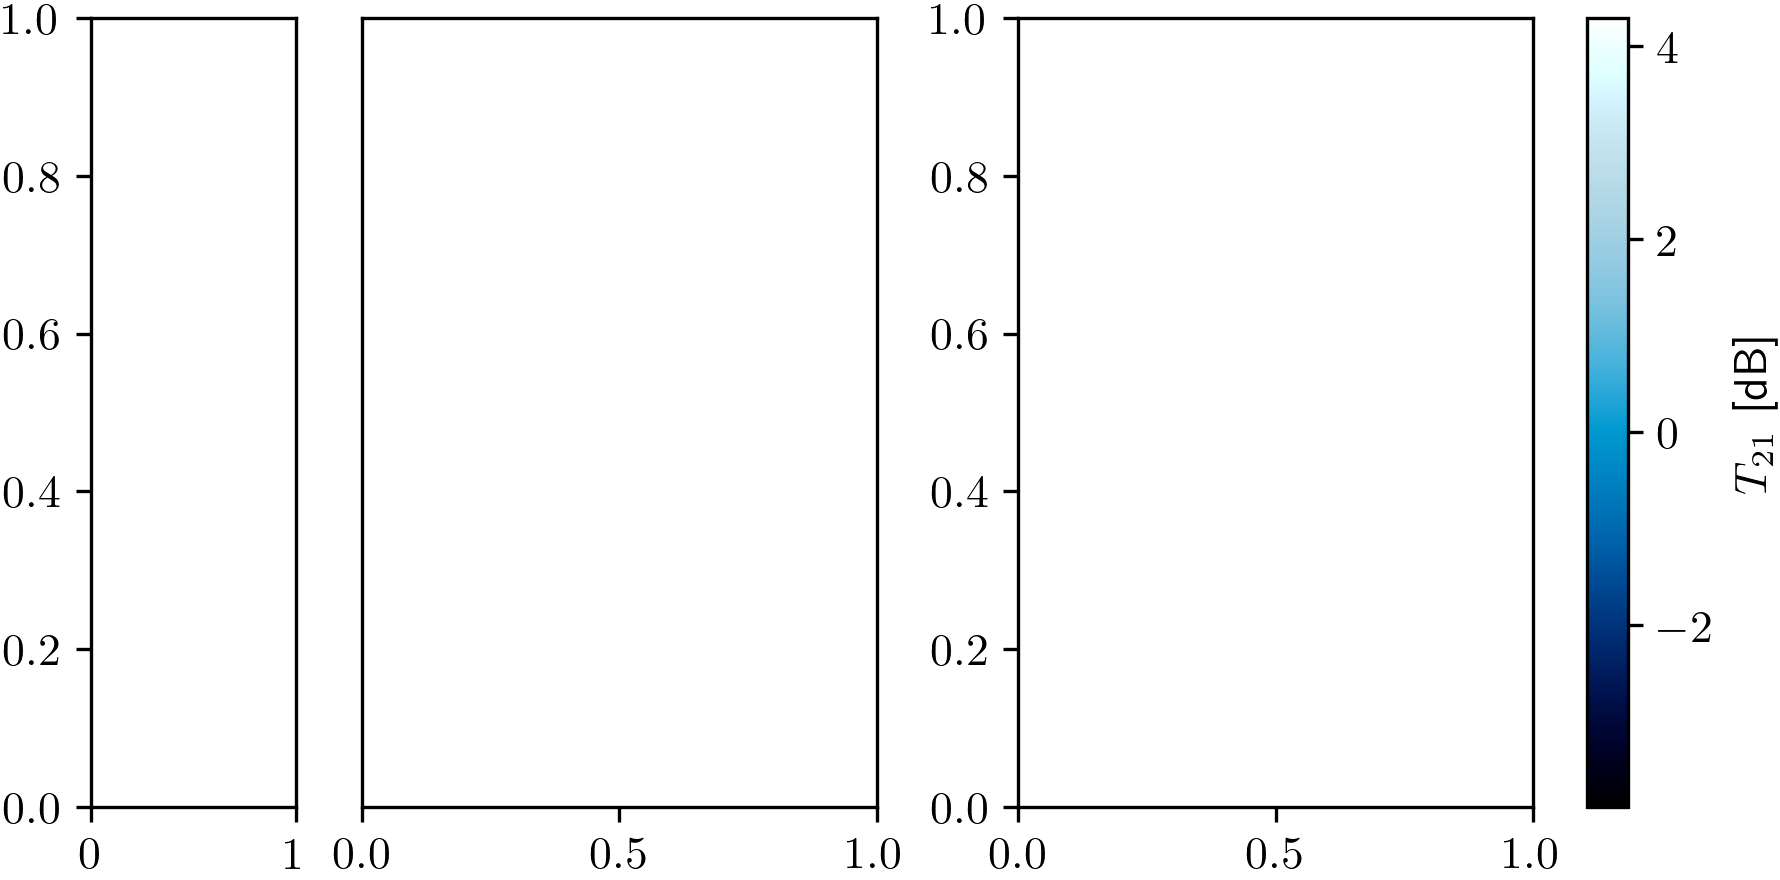

In [409]:
# Take care of image and colorbar   
ax_img_log.set_yticks([])
ax_img_log.set_yticklabels([])
im_log = ax_img.imshow(img_log, 
                   extent=ext,
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
ax_img.set_xscale('log')

fig.colorbar(im,label=clabel, cax=ax_clb)

<Figure size 1800x1080 with 0 Axes>

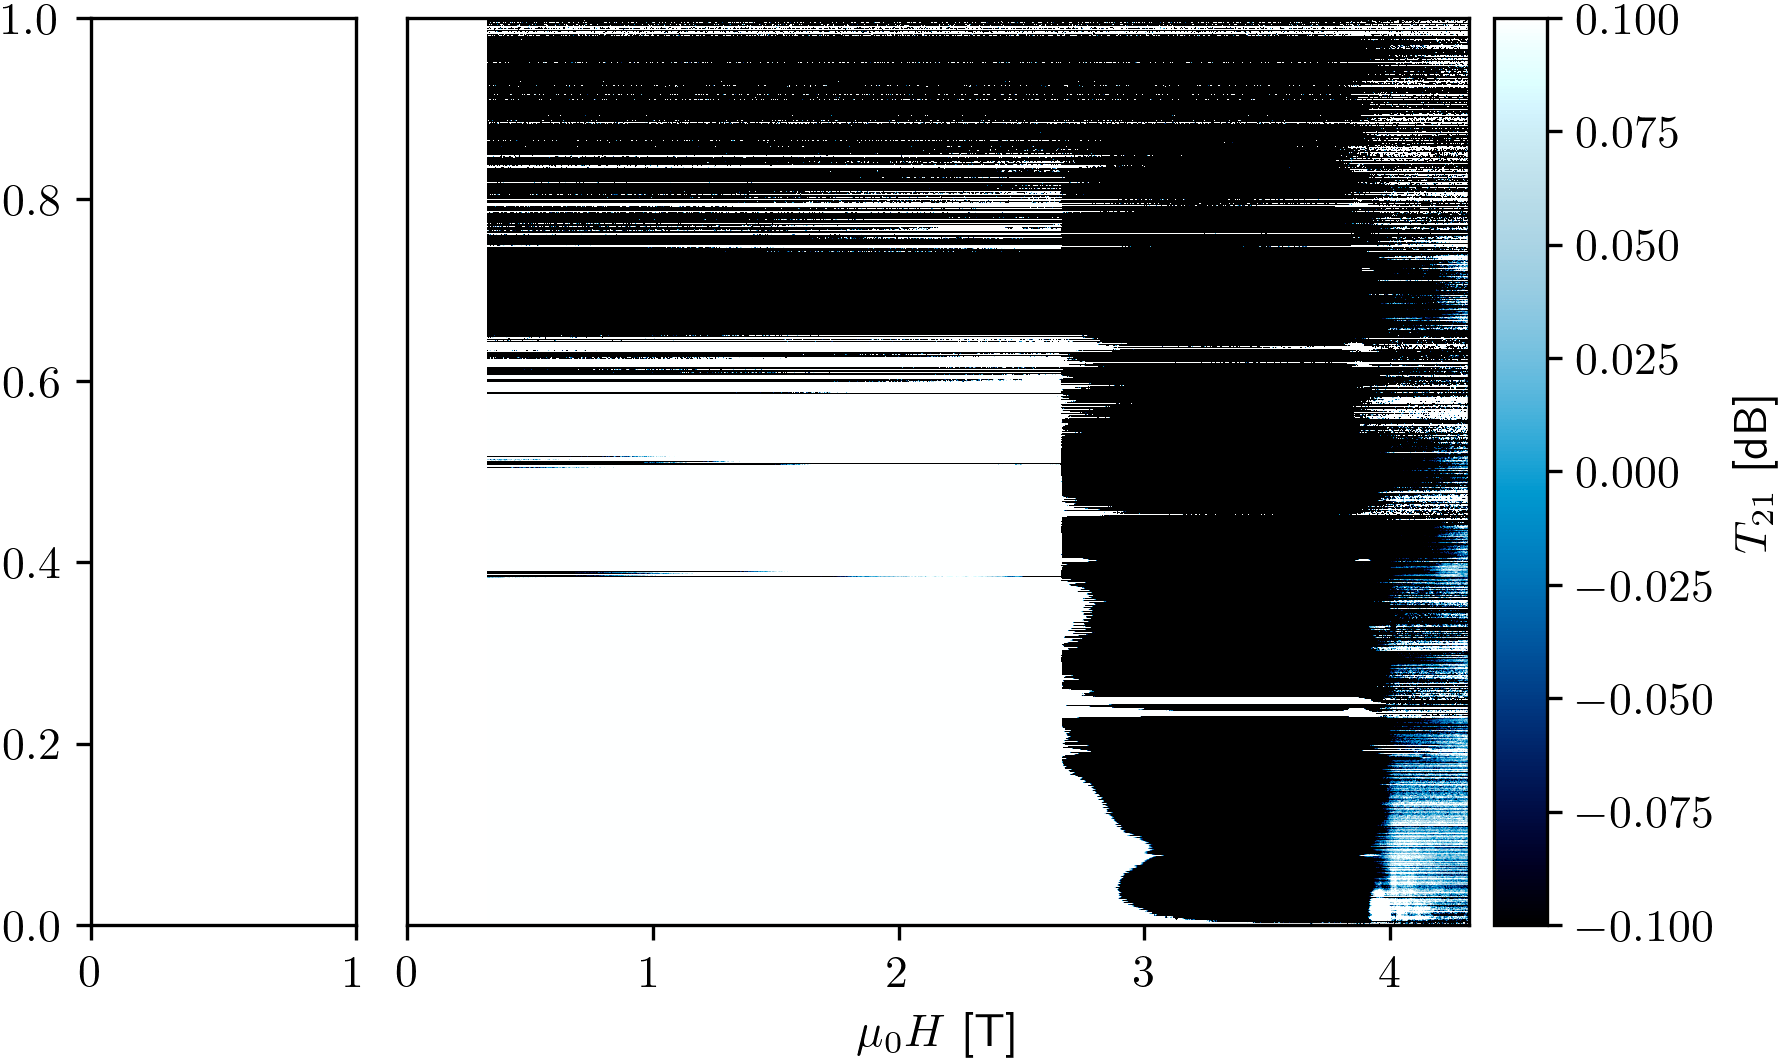

In [458]:
d=data
db=eva.complex_binning(d)
dn=eva.normS21(db)
img=np.log10(np.abs(dn['S21']))*20
norm=np.log10(np.abs(dn['Hnorm']))*20
#posN=d['H'][np.argmin(np.abs(db['H']))]
H=dn['H']
freq=dn['f']

Hlim=(0,300)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        
# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
fig.colorbar(im,label=clabel, cax=ax_clb)

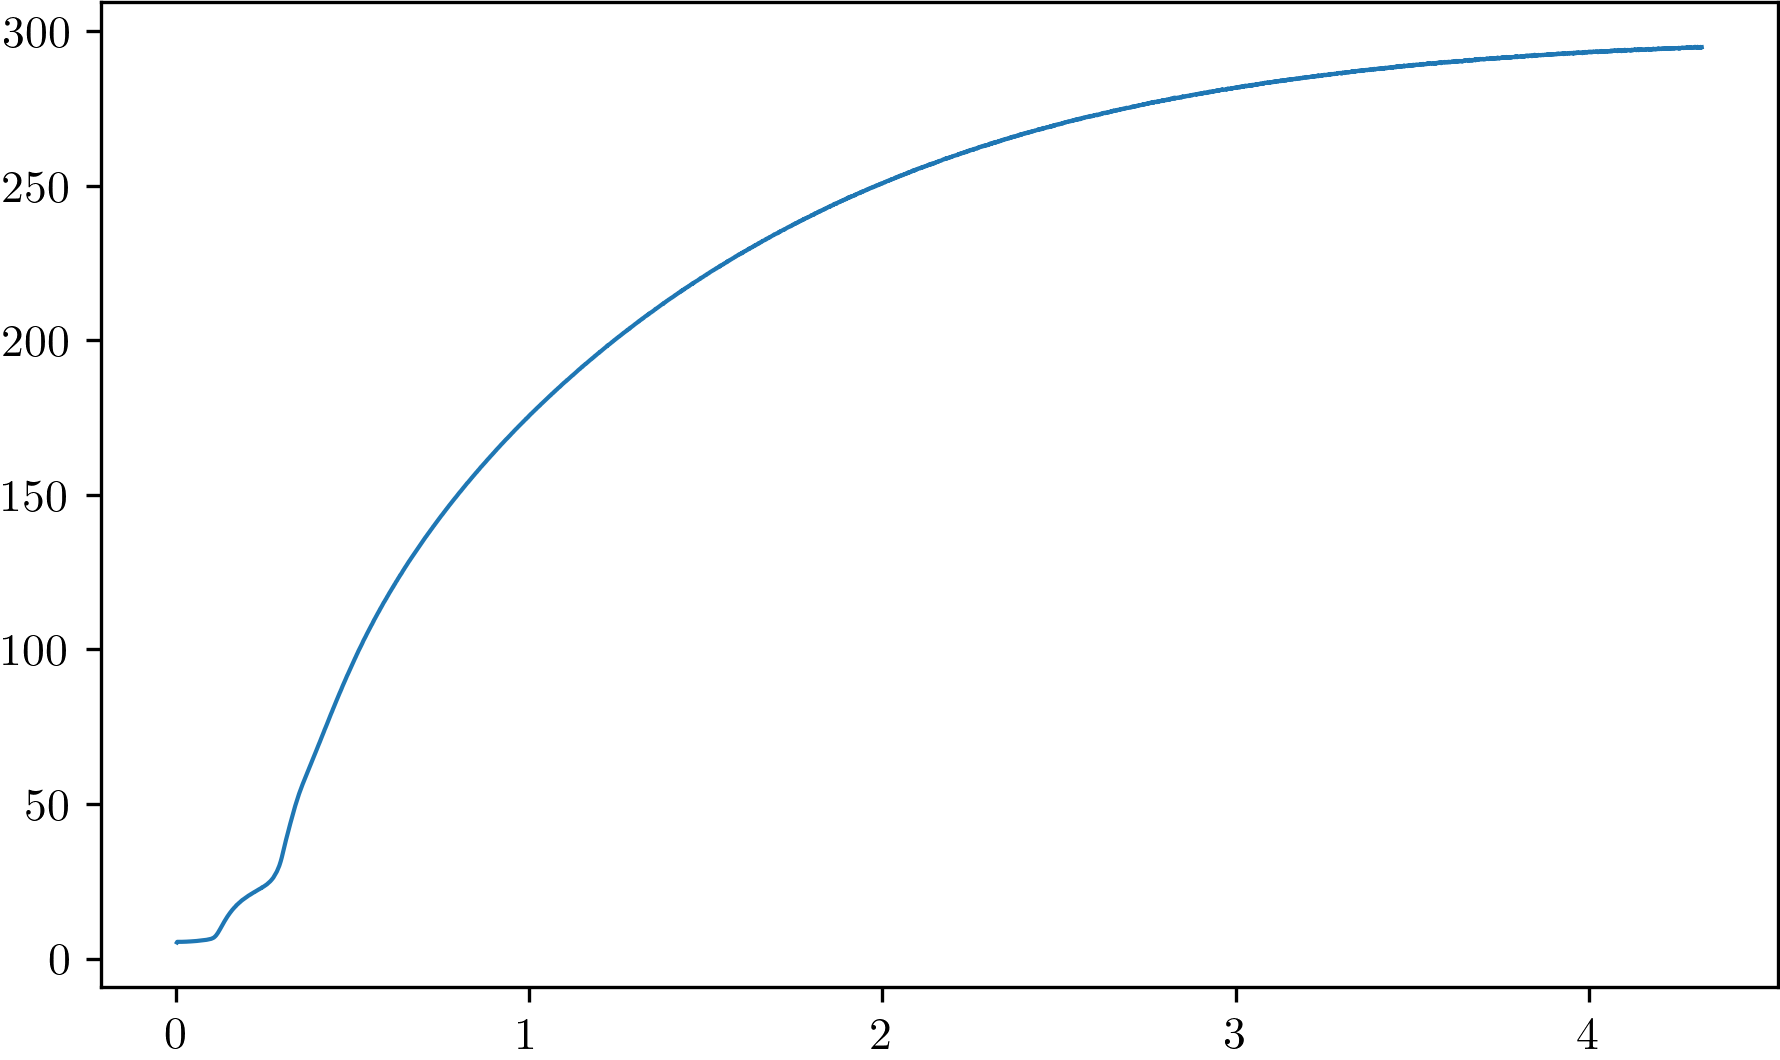

In [218]:
plt.plot(dn['H'],T)

In [4]:
db=eva.complex_binning(d,Hmin=-.15, Hmax=.55)

In [5]:
dn=eva.normS21(db)

In [6]:
dn

{'H': array([-0.15  , -0.1495, -0.149 , ...,  0.549 ,  0.5495,  0.55  ]),
 'Hnorm': array([[0.55]]),
 'S21': array([[0.99974434+5.39520007e-04j, 0.99971634+5.24967122e-04j,
         0.99968895+5.58681941e-04j, ..., 0.99984329+7.72442604e-05j,
         0.99990787+3.46843307e-05j, 1.        -5.55111512e-17j],
        [0.99970926+5.70892177e-04j, 0.99970251+5.54388559e-04j,
         0.9996695 +5.62222919e-04j, ..., 0.99985464+8.53794320e-05j,
         0.99992491+5.03506696e-05j, 1.        -2.77555756e-17j],
        [0.99972069+5.23832664e-04j, 0.99969218+5.31840518e-04j,
         0.99966495+5.16852570e-04j, ..., 0.99986394+5.59503046e-05j,
         0.99992821+2.86766971e-05j, 1.        -1.00397121e-16j],
        ...,
        [0.99954609+1.51496545e-02j, 0.99948266+1.52397639e-02j,
         0.99927071+1.53169562e-02j, ..., 0.99941371+1.17889075e-03j,
         0.99971541+6.67105829e-04j, 1.        +5.55111512e-17j],
        [0.99877104+1.43289924e-02j, 0.99877591+1.43307188e-02j,
         0

<Figure size 1800x1080 with 0 Axes>

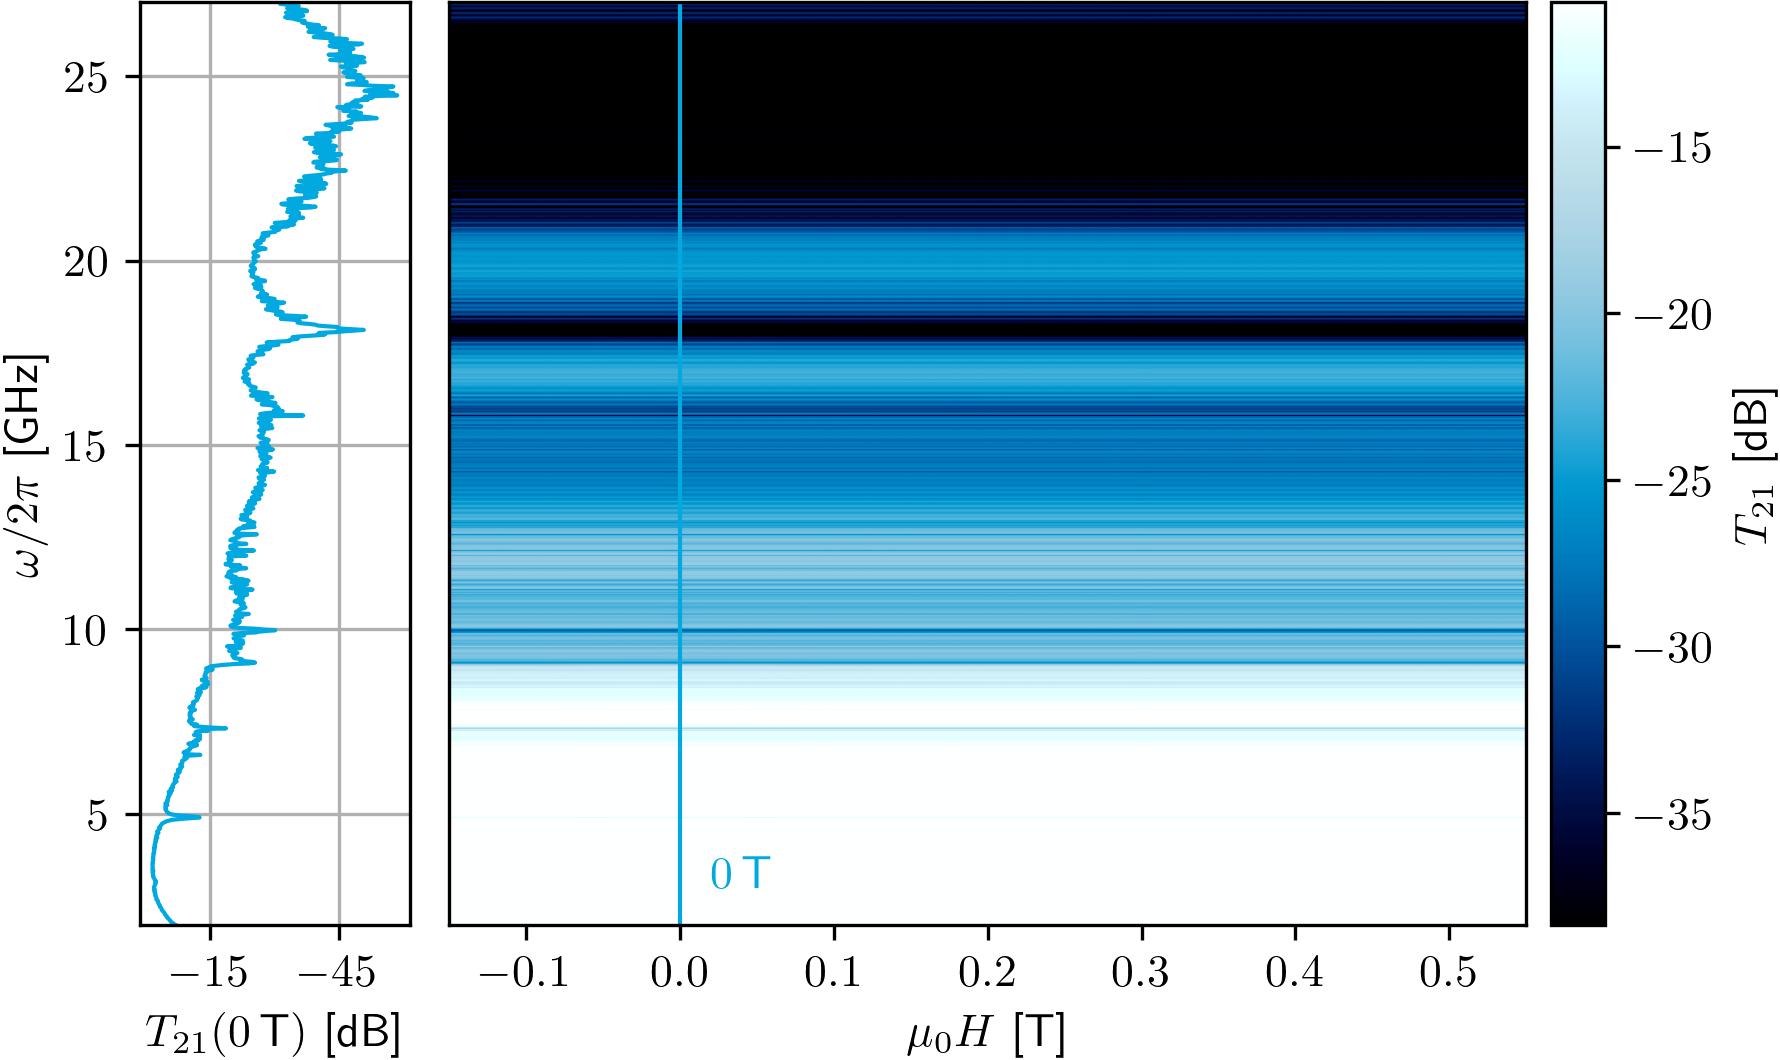

In [13]:
img=20*np.log10(np.abs(db['S21']))
norm=20*np.log10(np.abs(db['S21'][:,np.argmin(np.abs(db['H']))]))
posN=db['H'][np.argmin(np.abs(db['H']))]
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
ax_img.vlines(posN, ymin=ext[2], ymax=ext[3],
              color=cpd.curves()(1))
ax_img.text(0+.02,3,'$0\,$T',
              color=cpd.curves()(1))

ax_img.set_xticks(np.linspace(-.1,.5,7))

fig.colorbar(im,label=clabel, cax=ax_clb)

#fig.execute_constrained_layout()
fig.savefig('small_signal.pgf')

In [8]:
db=eva.complex_binning(d,Hmin=-.15, Hmax=.55)
dn=eva.normS21(db)
dn

{'H': array([-0.15  , -0.1495, -0.149 , ...,  0.549 ,  0.5495,  0.55  ]),
 'Hnorm': array([[0.55]]),
 'S21': array([[0.99974434+5.39520007e-04j, 0.99971634+5.24967122e-04j,
         0.99968895+5.58681941e-04j, ..., 0.99984329+7.72442604e-05j,
         0.99990787+3.46843307e-05j, 1.        -5.55111512e-17j],
        [0.99970926+5.70892177e-04j, 0.99970251+5.54388559e-04j,
         0.9996695 +5.62222919e-04j, ..., 0.99985464+8.53794320e-05j,
         0.99992491+5.03506696e-05j, 1.        -2.77555756e-17j],
        [0.99972069+5.23832664e-04j, 0.99969218+5.31840518e-04j,
         0.99966495+5.16852570e-04j, ..., 0.99986394+5.59503046e-05j,
         0.99992821+2.86766971e-05j, 1.        -1.00397121e-16j],
        ...,
        [0.99954609+1.51496545e-02j, 0.99948266+1.52397639e-02j,
         0.99927071+1.53169562e-02j, ..., 0.99941371+1.17889075e-03j,
         0.99971541+6.67105829e-04j, 1.        +5.55111512e-17j],
        [0.99877104+1.43289924e-02j, 0.99877591+1.43307188e-02j,
         0

<Figure size 1800x1080 with 0 Axes>

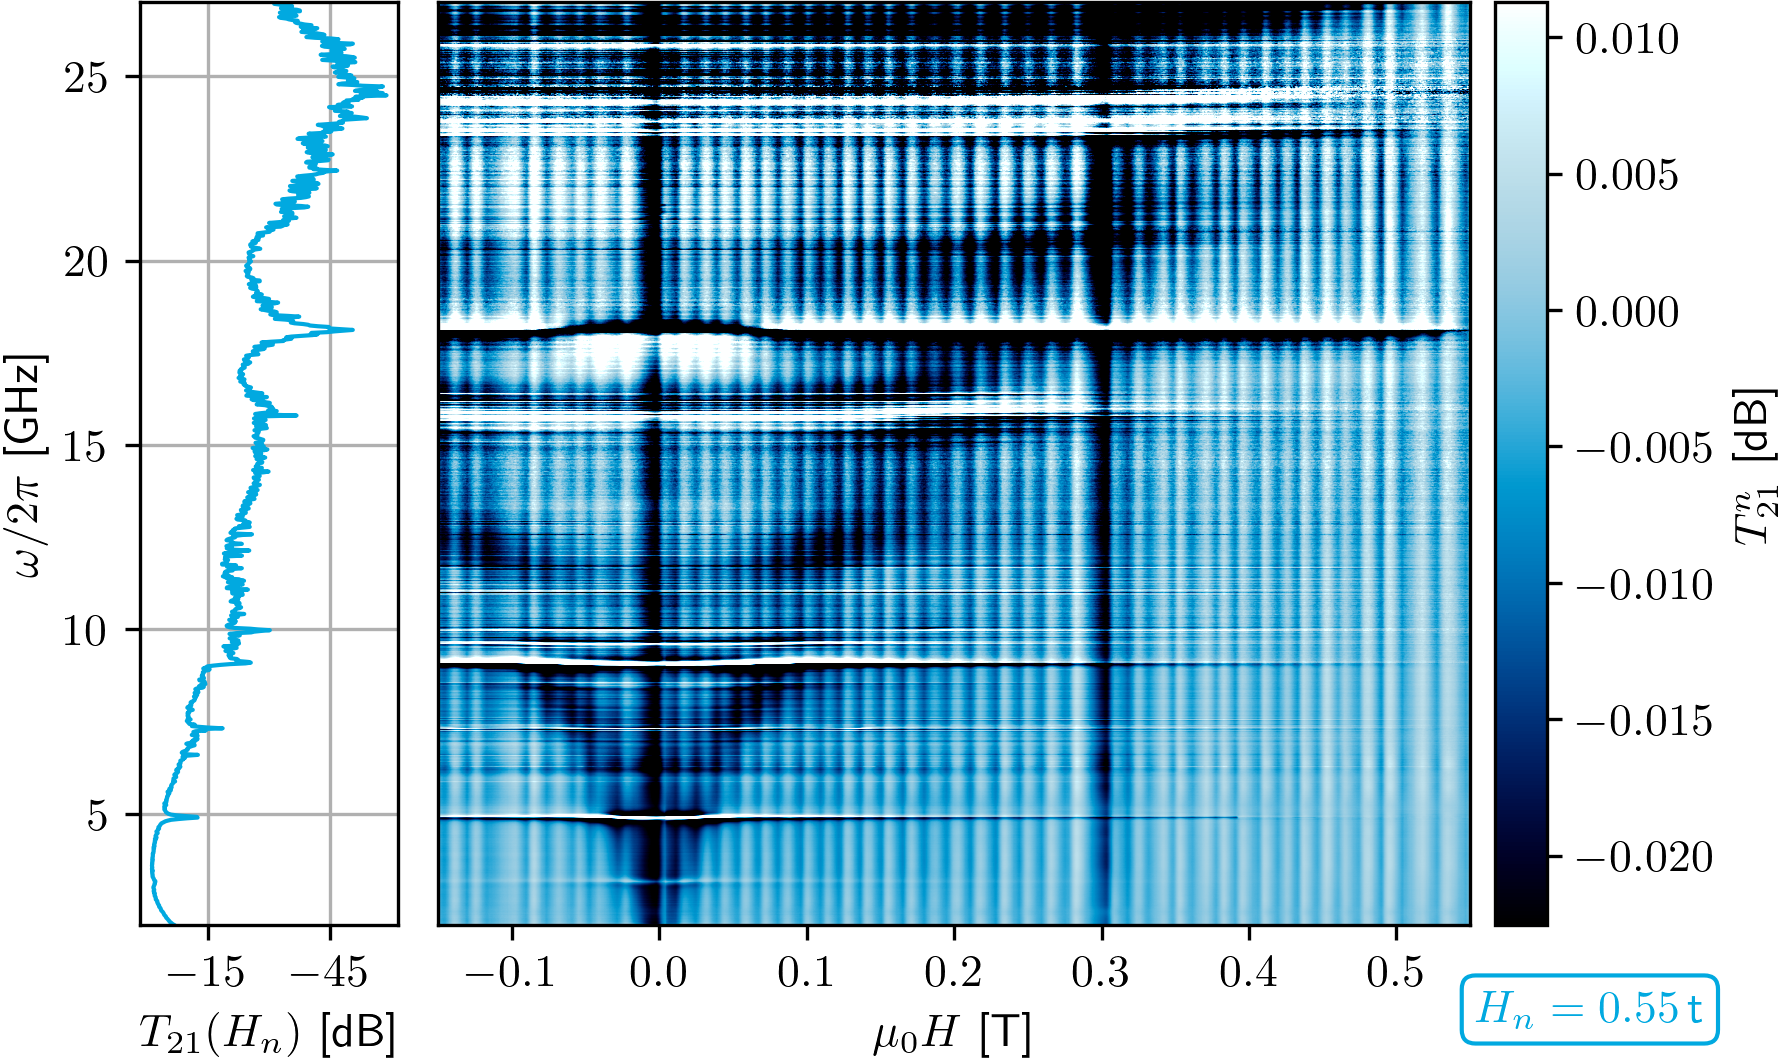

In [14]:
img=20*np.log10(np.abs(dn['S21']))
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(H_n)$ [dB]'
clabel='$T^n_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves(color='seeblau')(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
#ax_img.vlines(posN, ymin=ext[2], ymax=ext[3], lw=2,
#              color=cpd.curves(color='magenta')(1),
#              label="$H_n=%3.2f\,$T"%float(posN))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
#fig.text(.845,.07,
#             "$H_n=%3.2f\,$T"%float(posN),
#             color=cpd.curves(color='seeblau')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='seeblau')(1), 
#                       boxstyle='round'))
ax_clb.set_xticks([0])

fig.text(.825,.045,
            "$H_n=%3.2f\,$t"%float(posN),
            color=cpd.curves(color='seeblau')(1),
            bbox=dict(facecolor='white', 
                      edgecolor=cpd.curves(color='seeblau')(1), 
                      boxstyle='round'))

ax_img.set_xticks(np.linspace(-.1,.5,7))
ax_img.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img.set_xlim(ext[0],ext[1])
ax_img.set_ylim(ext[2],ext[3])


fig.colorbar(im,label=clabel, cax=ax_clb)


#fig.execute_constrained_layout()
fig.savefig('normed_signal.pgf')

In [16]:
20*np.log10(2+1),20*np.log10(2)

(9.542425094393248, 6.020599913279624)